RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가 (or 구매수량) 
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [1]:
# 데이터 파일 가져오기
import pandas as pd
path = './datasets/customer_order_data.csv'
cod_df = pd.read_csv(path)

In [2]:
# 전체 데이터 확인 
cod_df


# PurchaseDate : Recency
# ProductInformation: Frequencty () 구매수량?
# TransactionAmount : Monetary

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [3]:
# 필요한 feature 만 사용하도록 변경
cod_df_choice= cod_df[['PurchaseDate', 'TransactionAmount','ProductInformation']]

# 필요 데이터만 사용하도록 변경 후 메모리 사용량 및 결측치 확인
cod_df_choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PurchaseDate        1000 non-null   object 
 1   TransactionAmount   1000 non-null   float64
 2   ProductInformation  1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [4]:
# 결측치 확인
cod_df_choice.isna().sum()
print(f"결측데이터:", cod_df_choice.isna().sum(), sep='\n')

print()
# 중복행 확인
cod_df_choice.duplicated().sum()
print(f'중복데이터: {cod_df_choice.duplicated().sum()}')

# 결측 데이터 없는 것 확인

결측데이터:
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
dtype: int64

중복데이터: 0


In [5]:
# 이상치 검사 
# 구매날짜 이상치 확인

# 구매 날짜의 경우 최대값과 최소값이 2023년 으로 존재하며 2달 사이에 구매 날짜를 알아야 하기 때문에 날짜 형식을 변환하는게 필요
# 기준점은 2023년 07월 01일 보다 이전 날짜로 확인할것
# 해당 날짜에 차이에 대한 부분을 feature 를 추가 할 것

display(cod_df_choice['PurchaseDate'].min())
display(cod_df_choice['PurchaseDate'].max())

# 날짜의 차이가 크지 않아 이상치는 높지 않다고 판단


'2023-04-11'

'2023-06-10'

In [16]:
# 날짜를 계산하기 위해 datatime 타입으로 변경
# cod_df_choice['datetime_feature'] = pd.to_datetime(cod_df_choice['PurchaseDate'])


# 2023-07-01 날짜를 기준으로 각 날짜와의 차이를 계산 (기준점은 2023년 07월 01일 보다 이전 날짜로 확인할것)
default_date = pd.to_datetime('2023-07-01')

# 해당 날짜와 얼마나 차이가 나는지 Recency 컬럼 및 값 생성
# cod_df_choice['Recency'] = (default_date - cod_df_choice['datetime_feature']).dt.days
display(cod_df_choice)



,PurchaseDate,TransactionAmount,ProductInformation,datetime_feature,Recency,Frequency,Monetary
0,2023-04-11,943.31,Product C,2023-04-11,81,277,943.31
1,2023-04-11,463.70,Product A,2023-04-11,81,225,463.70
2,2023-04-11,80.28,Product A,2023-04-11,81,225,80.28
3,2023-04-11,221.29,Product A,2023-04-11,81,225,221.29
4,2023-04-11,739.56,Product A,2023-04-11,81,225,739.56
...,...,...,...,...,...,...,...
995,2023-06-10,759.62,Product B,2023-06-10,21,245,759.62
996,2023-06-10,941.50,Product C,2023-06-10,21,277,941.50
997,2023-06-10,545.36,Product C,2023-06-10,21,277,545.36
998,2023-06-10,729.94,Product B,2023-06-10,21,245,729.94


In [7]:
# 구매 수량의 경우 구매 항목이 다른 내용이 있는지 확인
cod_df_choice['ProductInformation'].value_counts()

# 총 4개 항목으로 구성되어 있으며 특이한 상품은 없는 것으로 확인

ProductInformation
Product C    277
Product D    253
Product B    245
Product A    225
Name: count, dtype: int64

In [8]:
# 구매 수량에 대한 데이터 추가
cod_df_choice['Frequency'] = cod_df_choice['ProductInformation']
# display(cod_df_choice[['Frequency']])


# 'Product A,B,C,D'의 빈도수 계산
product_a_count = cod_df_choice['Frequency'].value_counts()['Product A']
product_b_count = cod_df_choice['Frequency'].value_counts()['Product B']
product_c_count = cod_df_choice['Frequency'].value_counts()['Product C']
product_d_count = cod_df_choice['Frequency'].value_counts()['Product D']
display(product_a_count)

# 'Product A'의 경우 해당 값의 빈도수로 'Frequency' 열을 변경
cod_df_choice.loc[cod_df_choice['Frequency'] == 'Product A', 'Frequency'] = product_a_count
cod_df_choice.loc[cod_df_choice['Frequency'] == 'Product B', 'Frequency'] = product_b_count
cod_df_choice.loc[cod_df_choice['Frequency'] == 'Product C', 'Frequency'] = product_c_count
cod_df_choice.loc[cod_df_choice['Frequency'] == 'Product D', 'Frequency'] = product_d_count


# # 결과 확인
display(cod_df_choice)


225

,PurchaseDate,TransactionAmount,ProductInformation,datetime_feature,Recency,Frequency
0,2023-04-11,943.31,Product C,2023-04-11,81,277
1,2023-04-11,463.70,Product A,2023-04-11,81,225
2,2023-04-11,80.28,Product A,2023-04-11,81,225
3,2023-04-11,221.29,Product A,2023-04-11,81,225
4,2023-04-11,739.56,Product A,2023-04-11,81,225
...,...,...,...,...,...,...
995,2023-06-10,759.62,Product B,2023-06-10,21,245
996,2023-06-10,941.50,Product C,2023-06-10,21,277
997,2023-06-10,545.36,Product C,2023-06-10,21,277
998,2023-06-10,729.94,Product B,2023-06-10,21,245


In [9]:
# 구매가격 이상치 확인
import numpy as np

# 구매 가격의 경우 이상치가 있는지 사분위검사를 통해 최대값 최소값 확인
display(cod_df_choice[['TransactionAmount']].describe().T)


Q1 = cod_df_choice[['TransactionAmount']].describe().T.loc['TransactionAmount', '25%']
Q3 = cod_df_choice[['TransactionAmount']].describe().T.loc['TransactionAmount', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
uppper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'구매 가격의 정상치 범위: {lower_bound} ~ {uppper_bound}')

# 구매가격의 최대값이 이상치 범위 내에 있기 떄문에 확인 결과 이상치에 대한 부분은 없는 것으로 확인

# cod_df_choice[cod_df_choice['TransactionAmount'] >1513.97 ]

,count,mean,std,min,25%,50%,75%,max
TransactionAmount,1000.0,513.67781,286.0987,12.13,257.12,523.565,759.86,999.44


구매 가격의 정상치 범위: 0 ~ 1513.97


In [10]:
# 구매 가격에 대한 데이터 추가 
# (구매 가격의 경우 특정 클라이언트가 중복으로 구매한 항목에 대해서 다중으로 존재할 것으로 판단)
# 따라서 해당 구매 가격의 경우 컬럼으로 생성한 다음 RFM 항목에 대하여 기존 테이블로 이식
# 이후 order id 에 대한 중복값을 구분하여 구매 가격에 대한 데이터는 중복으로 늘려줄것

In [11]:
cod_df_choice['Monetary'] = cod_df_choice['TransactionAmount']

In [18]:
# 원본테이블에 RFM feature 추가
# display(cod_df_choice[['Recency','Frequency','Monetary']])

# cod_df['Recency'] = cod_df_choice['Recency']
# cod_df['Frequency'] = cod_df_choice['Frequency']
# cod_df['Monetary'] = cod_df_choice['Monetary']
display(cod_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81,277,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,81,225,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,81,225,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,81,225,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,81,225,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,21,245,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,21,277,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,21,277,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,21,245,729.94


In [186]:
# 회원 정보에 따른 상품 중복 구매 확인
filtered_df = cod_df.groupby('CustomerID').filter(lambda x: x['ProductInformation'].count() >= 2)
filtered_df =filtered_df.sort_values(by='CustomerID')[['CustomerID','Recency','Frequency', 'Monetary']]

# 해당 회원들의 RFM 의 평균 값 확인
group_by_df = filtered_df.groupby('CustomerID').mean().sort_values(by='CustomerID')
group_by_df['Recency']
group_by_df['Frequency']
group_by_df['Monetary']

# 실제 원본 df 항목에서 해당 customerID 의 RFM 항목 변경]
for customer_ID in group_by_df.index:
    Recency = group_by_df.at[customer_ID, 'Recency']
    Frequency = group_by_df.at[customer_ID, 'Frequency']
    Monetary = group_by_df.at[customer_ID, 'Monetary']
    
    cod_df.loc[cod_df['CustomerID'] == customer_ID, 'Recency'] = float(Recency)
    cod_df.loc[cod_df['CustomerID'] == customer_ID, 'Frequency'] = float(Frequency)
    cod_df.loc[cod_df['CustomerID'] == customer_ID, 'Monetary'] = float(Monetary)

display(cod_df)






TypeError: agg function failed [how->mean,dtype->object]

In [123]:
from sklearn.preprocessing import MinMaxScaler
# 각 고객들의 RFM 에 대하여 정규화를 시켜서 TotalCount 구하기

cod_rfm_df = cod_df[['Recency','Frequency','Monetary']]

normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(cod_rfm_df)


cod_rfm_df = pd.DataFrame(rfm_normalization, columns=cod_rfm_df.columns)

# cod_df 에 TotalScore 추가 및 기존에 있던 RFM 데이터 삭제
cod_df['TotalScore'] = cod_rfm_df['Recency'] + cod_rfm_df['Frequency'] + cod_rfm_df['Monetary']
cod_df = cod_df.drop(labels = ['Recency','Frequency','Monetary'], axis=1)
display(cod_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,TotalScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,2.943149
1,2188,2023-04-11,463.70,Product A,176819,London,1.457374
2,4608,2023-04-11,80.28,Product A,340062,New York,1.069026
3,2559,2023-04-11,221.29,Product A,239145,London,1.211848
4,9482,2023-04-11,739.56,Product A,194545,Paris,1.736780
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1.141713
996,6669,2023-06-10,941.50,Product C,987025,New York,1.941315
997,8836,2023-06-10,545.36,Product C,512842,London,1.540084
998,1440,2023-06-10,729.94,Product B,559753,Paris,1.111651


In [245]:
# 각각의 고객들에 대하여 RFM 점수를 통한 level 구분

display(cod_df.describe().T)

import numpy as np

level_1, level_2, level_3, level_4 = np.percentile(cod_df['TotalScore'], [25, 40, 75, 85])
print(level_1, level_2, level_3, level_4)

,count,mean,std,min,25%,50%,75%,max
CustomerID,1000.0,5554.789000,2605.014863,1011.000000,3273.000000,5538.000000,7821.750000,9991.000000
TransactionAmount,1000.0,513.677810,286.098700,12.130000,257.120000,523.565000,759.860000,999.440000
OrderID,1000.0,554071.398000,264695.448814,100096.000000,313152.000000,564671.500000,783052.250000,999695.000000
TotalScore,1000.0,1.526939,0.530547,0.088169,1.163671,1.511359,1.898612,2.943149


1.1636711243890092 1.3843805974742553 1.8986117289947897 2.110107872102104


In [246]:
# 등급 구분을 위한 함수 생성
def get_level(x):
    if x <= level_1:
        return 5
    if x > level_1 and x <= level_2:
        return 4
    if x > level_2 and x <= level_3:
        return 3
    if x > level_3 and x <= level_4:
        return 2
    return 1

In [247]:
# 데이터 프레임에 TotalScore 추가
cod_df['level'] = cod_df['TotalScore'].apply(get_level)

In [248]:
cod_df['level'].value_counts()
# cod_df['TotalScore'].value_counts()

level
3    349
5    250
4    151
1    150
2    100
Name: count, dtype: int64

In [249]:
# level에 대한 값을 치환
cod_df['level'] = cod_df['level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP'])

In [250]:
cod_df['level'].value_counts()

level
Gold       349
Bronze     250
Sliver     151
VIP        150
Diamond    100
Name: count, dtype: int64

In [251]:
cod_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,TotalScore,level
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,2.943149,VIP
1,2188,2023-04-11,463.70,Product A,176819,London,1.457374,Gold
2,4608,2023-04-11,80.28,Product A,340062,New York,1.069026,Bronze
3,2559,2023-04-11,221.29,Product A,239145,London,1.211848,Sliver
4,9482,2023-04-11,739.56,Product A,194545,Paris,1.736780,Gold
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,1.141713,Bronze
996,6669,2023-06-10,941.50,Product C,987025,New York,1.941315,Diamond
997,8836,2023-06-10,545.36,Product C,512842,London,1.540084,Gold
998,1440,2023-06-10,729.94,Product B,559753,Paris,1.111651,Bronze


<Axes: xlabel='level', ylabel='count'>

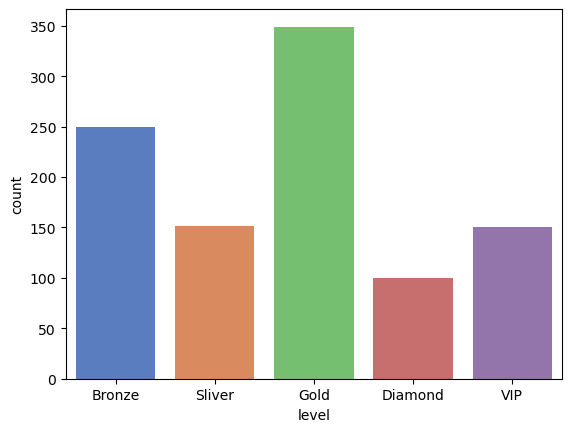

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']
sns.countplot(x='level', data=cod_df, palette='muted', order = order_columns)

<Axes: xlabel='level', ylabel='TotalScore'>

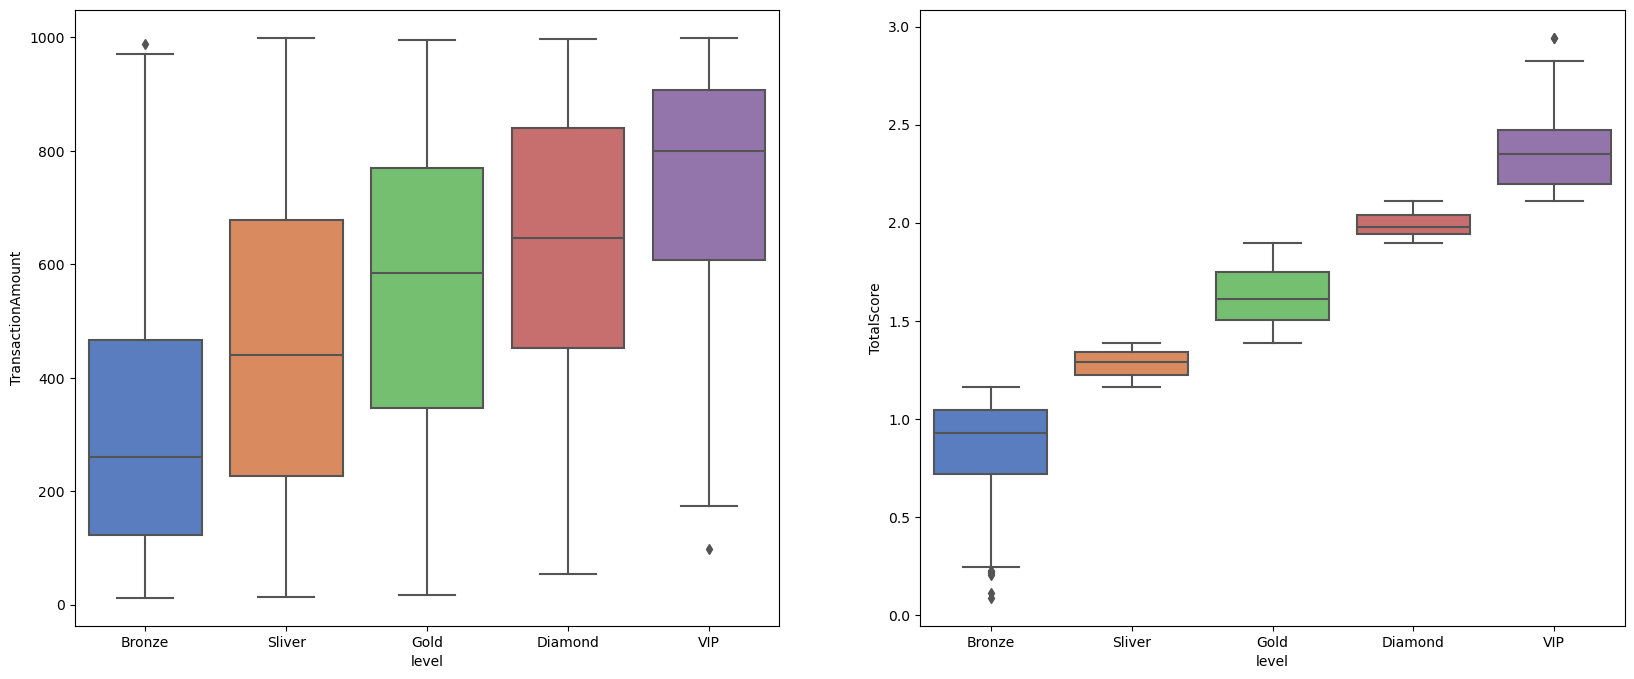

In [258]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']
sns.boxplot(ax=axes[0], x='level', y='TransactionAmount', data=cod_df, palette='muted', order = order_columns )
sns.boxplot(ax=axes[1], x='level', y='TotalScore', data=cod_df, palette='muted', order = order_columns )

<Axes: xlabel='PurchaseDate', ylabel='count'>

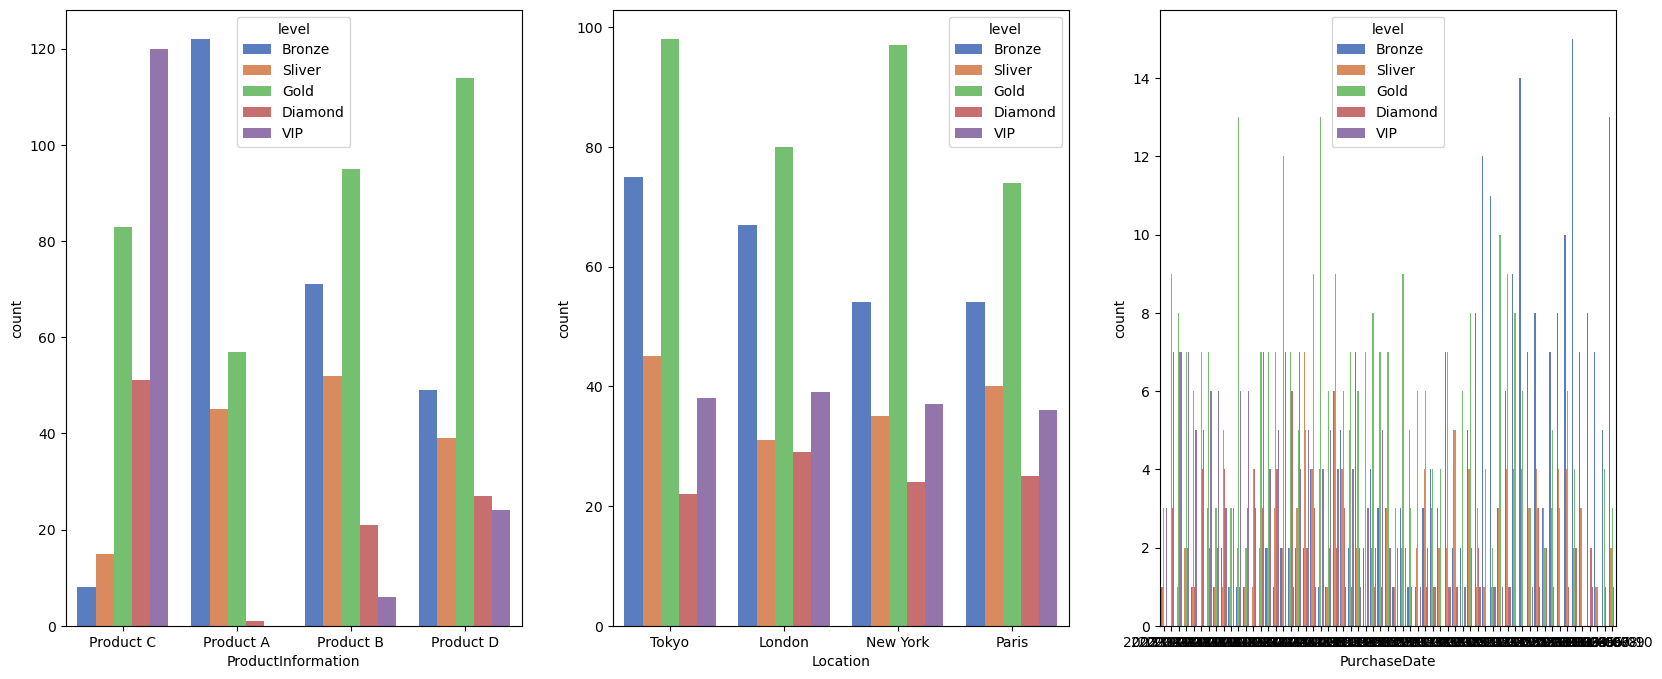

In [260]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']
sns.countplot(ax=axes[0], x='ProductInformation', hue='level', data=cod_df, palette='muted', hue_order= order_columns)
sns.countplot(ax=axes[1], x='Location', hue='level', data=cod_df, palette='muted', hue_order= order_columns)

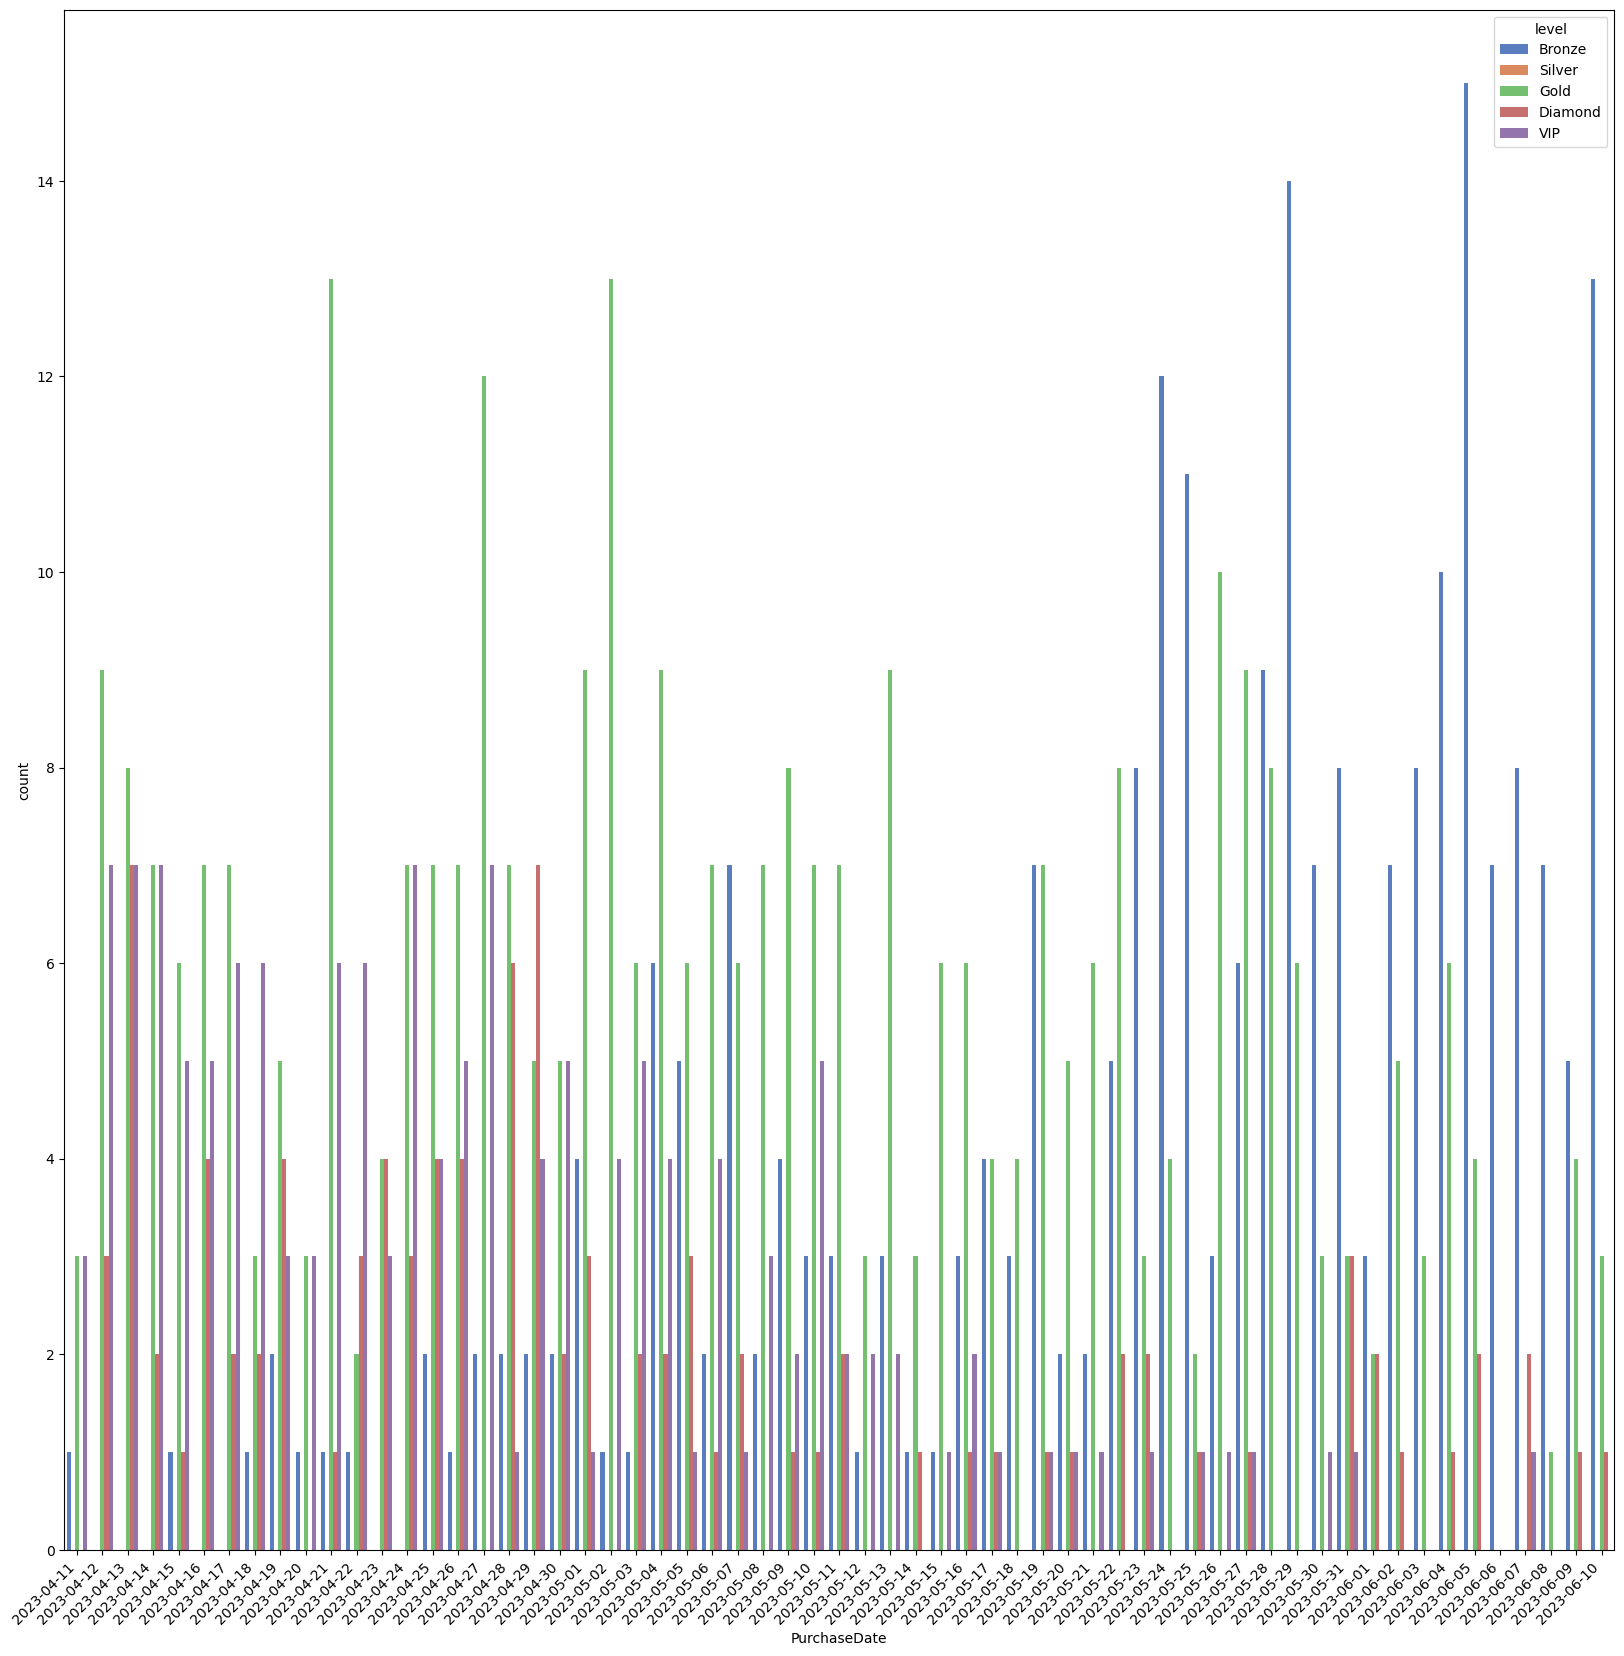

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(20, 20))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']
sns.countplot(ax=axes, x='PurchaseDate', hue='level', data=cod_df, palette='muted', hue_order=order_columns)

axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha="right")
plt.show()


In [ ]:

# 제공하신 이미지에 있는 그래프는 박스 플롯(box plot) 또는 상자 그림이라고 불립니다. 박스 플롯은 데이터의 분포를 시각적으로 나타내는 방법 중 하나로, 데이터의 중앙값(median), 사분위수(quartile), 이상치(outlier) 등을 한눈에 파악할 수 있게 합니다. 이 그래프는 'level'이라는 범주형 변수에 따른 'TransactionAmount'의 분포를 나타내고 있습니다.

# 박스 플롯의 주요 구성 요소는 다음과 같습니다:

# 박스(Box): 박스의 하단과 상단은 각각 하위 사분위수(Q1, 25%)와 상위 사분위수(Q3, 75%)를 나타냅니다. 박스 안의 수평선은 중앙값(median, Q2, 50%)을 나타냅니다.
# 수염(Whisker): 박스 위아래로 나와 있는 선은 "수염"이라고 불리며, 일반적으로 Q1 - 1.5 * IQR (interquartile range)와 Q3 + 1.5 * IQR 사이의 값을 나타냅니다. 여기서 IQR은 사분위 범위(Q3 - Q1)입니다.
# 이상치(Outlier): 수염 바깥에 있는 점들은 이상치로 간주되며, 일반적으로 정상 범위를 벗어난 데이터 포인트를 나타냅니다.
# 그래프에 표시된 각 색상의 박스는 'Bronze', 'Silver', 'Gold', 'Diamond', 'VIP' 레벨에 해당하는 고객들의 'TransactionAmount' 분포를 보여줍니다. 각 레벨의 고객들이 얼마나 많은 금액을 거래했는지, 그리고 거래 금액이 얼마나 변동했는지 파악할 수 있습니다.

# 세로선(수염)이 끝나는 지점은 해당 레벨의 고객들이 대부분 거래한 금액의 최소값과 최대값을 나타내며, 수염 바깥의 점들은 일반적인 거래 범위를 벗어난 이상치 거래를 나타냅니다. 이러한 이상치는 데이터에 노이즈가 될 수도 있지만, 때로는 중요한 비즈니스 인사이트를 제공할 수도 있습니다



In [306]:
# cod_df['PurchaseDate'].value_counts().head(30)


# test = cod_df['PurchaseDate'].value_counts().head(50)
# test.sort_values()

# value_counts()를 사용하여 빈도수를 계산하고 시리즈로 저장합니다.
test = cod_df['PurchaseDate'].value_counts().head(50)

# 시리즈를 데이터프레임으로 변환합니다.
test_df = test.reset_index()

# 'index' 열을 날짜 타입으로 변환합니다.
test_df['PurchaseDate'] = pd.to_datetime(test_df['PurchaseDate'])

# 날짜 순으로 정렬합니다.
test_sorted = test_df.sort_values('PurchaseDate')

# 빈도수를 기준으로 내림차순 정렬하고 싶다면, 다음과 같이 할 수 있습니다.
# 이 경우는 날짜가 아니라 빈도수를 기준으로 내림차순 정렬합니다.
test_sorted_by_values = test_df.sort_values(by='PurchaseDate', ascending=False)
test_filtered_df = test_sorted_by_values[test_sorted_by_values['count'] >= 20]
test_filtered_df

,PurchaseDate,count
5,2023-06-05,23
8,2023-06-04,21
1,2023-05-29,24
10,2023-05-28,21
11,2023-05-27,21
2,2023-05-10,23
0,2023-05-04,27
7,2023-05-02,22
9,2023-05-01,21
12,2023-04-30,21


### 그래프 분석
> RFM 의 점수 결과를 통해 4분위를 측정하여 25, 40, 75 ,80 기준으로 회원들의 등급을 구분하였습니다.
> 중복되는 id의 경우 최초 각각의 행에 대하여 RFM 수치를 구한 후 상품별 Count 가 2개 이상인 고객들에 대하어 평균값을 확인하여 RFM을 업데이트 후 별도로 행 제거는 하지 않았습니다.
> 실제로 같은 회원이라도 다른 날, 다른 지역, 다른 상품을 구매한 것이기 때문에 데이터 삭제가 아닌 같은 값을 부여하여 동일한 등급을 가지도록 하였습니다.


### 마케팅 전략 제안
> 현재 level에 따른 인원의 분포가 gold 레벨에서 많은 것을 확인 할 수 있습니다. 또한 상품을 보았을 때 gold 고객은 Product D > B > C > A 순으로
많은 상품을 구매 한것으로 확인되어 현재 가장 높은 D 상품을 주력으로 밀면서 수치가 가장 낮은 A 상품을 추가로 홍보하여 gold 고객의 상품 구매를 유치해야 합니다.
> 구매 카운트 20개 이상인 날짜들을 봤을 때 월, 화 의 요일보다 토 < 금 < 일 수준으로 구매 count 가 높은 것을 확인 할 수 있었으며,
주말과 연휴 직전의 상품 구매를 유도할 수 있는 부스를 증가하여 전반적인 고객의 상품 구매 카운트를 증가하도록 유발할 수 있습니다.
> 5월 그래프를 확인 했을 때 다른 날짜보다 bronze 고객의 상품 구매 카운트가 증가한 부분을 확인하였고, 해당 개월에는 기존 잘 팔리는 상품인 A,B 상품의 재고를 준비하여 수요에 차질이 없도록 해야합니다.

In [ ]:
# CustomerID: 고객 번호
# PurchaseDate: 구매 날짜
# TransactionAmount: 결제 금액
# ProductInformation: 상품 정보
# OrderID: 주문 번호
# Location: 주문 지역

In [58]:
# 해당 데이터에서 CustomerID 중복값을 확인 (ID 중복값이 있는 데이터는 총 54 개로 확인)

# cod_df[['CustomerID', 'PurchaseDate','TransactionAmount','ProductInformation']]\
# .groupby('CustomerID', 'PurchaseDate','TransactionAmount','ProductInformation').count()



group_customer_id = cod_df.groupby(['CustomerID']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
group_customer_id
# cod_df[cod_df['CustomerID'] == 5557]


,CustomerID,Count
472,5557,3
661,7363,3
389,4804,3
0,1011,2
113,2133,2
...,...,...
326,4166,1
327,4178,1
328,4185,1
329,4190,1
